https://www.youtube.com/watch?v=mARDtwaphfM

In [1]:
import numpy as np
import pandas as pd 

In [2]:
## 람다함수 예시 

# 첫 번째 Lambda 함수: 주어진 숫자를 2로 나눔
f = lambda x: x / 2
print(f(3))  # 3을 2로 나누면 1.5가 출력됨

# 두 번째 Lambda 함수: 주어진 숫자의 제곱을 계산
f = lambda x: x ** 2
print(f(3))  # 3의 제곱은 9이므로 9가 출력됨

# 세 번째 Lambda 함수: 이름 없이 바로 실행, 주어진 숫자에 1을 더함
print((lambda x: x + 1)(5))  # 5에 1을 더하면 6이므로 6이 출력됨


1.5
9
6


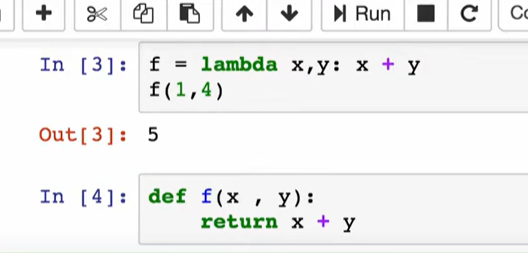

=> 위 아래 똑같음 

In [4]:
ex = [1, 2, 3, 4, 5]

# 각 리스트 요소를 제곱하는 lambda 함수 정의
f = lambda x: x ** 2

# map 함수를 사용하여 리스트의 각 요소에 lambda 함수 적용
result = list(map(f, ex))

print(result)  # [1, 4, 9, 16, 25] 출력


[1, 4, 9, 16, 25]


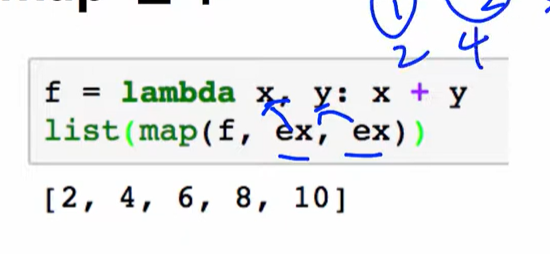

map for series 

In [10]:
# Series s1 생성: 값은 0부터 9까지
s1 = pd.Series(np.arange(10))
print(s1.head(5))  # 처음 5개의 데이터를 출력

# lambda 함수를 사용하여 s1의 각 요소를 제곱
squared = list(map(lambda x: x ** 2, s1))
print(squared[:5])  # 제곱된 결과 중 처음 5개의 데이터를 출력
# map 함수는 head() 지원 X 

# # lambda 함수를 사용하여 s1의 각 요소를 제곱
# squared = s1.map(lambda x: x ** 2)
# print(squared.head(5))  # 제곱된 결과 중 처음 5개의 데이터를 출력


0    0
1    1
2    2
3    3
4    4
dtype: int32
[0, 1, 4, 9, 16]


In [11]:
# Series s1 생성: 값은 0부터 9까지
s1 = pd.Series(np.arange(10))

# dict z 생성: 특정 값을 A, B, C로 매핑
z = {1: 'A', 2: 'B', 3: 'C'}

# map 함수를 사용하여 s1의 값을 dict z의 값으로 대체
mapped_s1 = s1.map(z)
print(mapped_s1.head(5))  # 처음 5개의 데이터를 출력

# Series s2 생성: 값은 10부터 19까지
s2 = pd.Series(np.arange(10, 20))

# map 함수를 사용하여 s1의 값을 s2의 값으로 대체
mapped_s2 = s1.map(s2)
print(mapped_s2.head(5))  # 처음 5개의 데이터를 출력

0    NaN
1      A
2      B
3      C
4    NaN
dtype: object
0    10
1    11
2    12
3    13
4    14
dtype: int32


In [12]:
df = pd.DataFrame({
    'sex': ['male', 'female', 'female', 'male', 'female'],
    'earn': [50000, 60000, 75000, 48000, 62000],
    'height': [175.3, 160.5, 165.4, 180.3, 158.9],
})

# Replace 함수 사용: 'male'은 0으로, 'female'은 1로 변환
# dict 형태를 진짜 많이 씀 
df['sex_replace'] = df['sex'].replace({'male': 0, 'female': 1})
print(df.head())  

# Replace 함수 사용 (inplace=True): 'male'은 0으로, 'female'은 1로 변환
df['sex'].replace(['male', 'female'], [0, 1], inplace=True)
print(df.head())  


      sex   earn  height  sex_replace
0    male  50000   175.3            0
1  female  60000   160.5            1
2  female  75000   165.4            1
3    male  48000   180.3            0
4  female  62000   158.9            1
   sex   earn  height  sex_replace
0    0  50000   175.3            0
1    1  60000   160.5            1
2    1  75000   165.4            1
3    0  48000   180.3            0
4    1  62000   158.9            1


apply 함수는 DataFrame의 각 열(Series)에 함수를 적용할 때 사용,<br>
아래 에서는 apply 이용하여 각 열의 최대값과 최소값의 차이를 계산하는 함수가 적용되었음 

In [13]:
# DataFrame 생성
df_info = pd.DataFrame({
    'earn': [79571.299011, 96396.988643, 48710.666947, 80478.096153, 82089.345498],
    'height': [73.89, 66.23, 63.77, 63.73, 63.08],
    'age': [49, 62, 95, 43, 68]
})

# 람다 함수 정의: 각 컬럼의 최대값에서 최소값을 뺌
f = lambda x: x.max() - x.min()

# apply 함수 사용: 각 컬럼에 함수 적용
result = df_info.apply(f)
print(result)


earn      47686.321696
height       10.810000
age          52.000000
dtype: float64


In [14]:
# sum 함수 사용: 각 열의 합계 계산
sum_result = df_info.sum()

# apply 함수로 sum 함수 적용
apply_sum_result = df_info.apply(sum)

print(sum_result)
print(apply_sum_result)

# 같은 결과 

earn      387246.396252
height       330.700000
age          317.000000
dtype: float64
earn      387246.396252
height       330.700000
age          317.000000
dtype: float64


In [15]:
from pandas import Series

# 함수 정의: 각 열의 최소값과 최대값을 Series로 반환
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])

# apply 함수 사용: 각 열에 함수 적용
result_series = df_info.apply(f)
print(result_series)


             earn  height  age
min  48710.666947   63.08   43
max  96396.988643   73.89   95


In [16]:
# 람다 함수 정의: 각 값을 음수로 변환
f = lambda x: -x

# applymap 함수 사용: DataFrame 전체에 함수 적용
negative_df = df_info.applymap(f)
print(negative_df.head())

# apply 함수 사용: 특정 열에 함수 적용
negative_earn = df_info['earn'].apply(f)
print(negative_earn.head())


           earn  height  age
0 -79571.299011  -73.89  -49
1 -96396.988643  -66.23  -62
2 -48710.666947  -63.77  -95
3 -80478.096153  -63.73  -43
4 -82089.345498  -63.08  -68
0   -79571.299011
1   -96396.988643
2   -48710.666947
3   -80478.096153
4   -82089.345498
Name: earn, dtype: float64


C:\Users\jeyki\AppData\Local\Temp\ipykernel_29348\1470064431.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  negative_df = df_info.applymap(f)
